In [ ]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import nltk

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer

nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('1429_1.csv')

<ipython-input-100-f8f4b4256c41>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1429_1.csv')


In [ ]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

**Drop Null Data**

In [ ]:
df = df.dropna(subset = ['reviews.rating', 'reviews.text', 'reviews.username'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34624 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34624 non-null  object 
 1   name                  27865 non-null  object 
 2   asins                 34622 non-null  object 
 3   brand                 34624 non-null  object 
 4   categories            34624 non-null  object 
 5   keys                  34624 non-null  object 
 6   manufacturer          34624 non-null  object 
 7   reviews.date          34595 non-null  object 
 8   reviews.dateAdded     24038 non-null  object 
 9   reviews.dateSeen      34624 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34064 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34129 non-null  float64
 14  reviews.rating        34624 non-null  float64
 15  reviews.sourceURLs 

**Word Cloud**

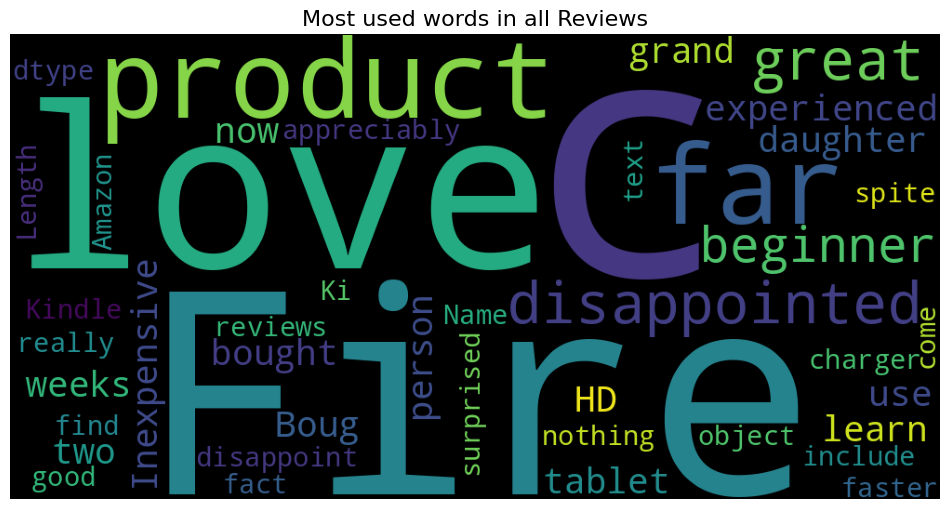

In [ ]:
all_words = pd.Series(' '.join(str(df['reviews.text']).split()))

# plot word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize = (12, 8))

plt.imshow(wordcloud)
plt.title("Most used words in all Reviews", size=16)

plt.axis("off")
plt.show()

**Preprocess Text Data**

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# wnl = WordNetLemmatizer()
# stemmer = nltk.SnowballStemmer("english")
# stemmer = nltk.PorterStemmer()
stemmer = nltk.LancasterStemmer()

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c', 'and', 'I', 'A', 'And', 'So', 'arnt', 'This', 'When', 'It', 'many', 'Many', 'so', 'cant', 'Yes', 'yes', 'No', 'no', 'These', 'these']
stop_words = stop_words + more_stopwords

def preprocess_data(text):
    text = clean_text(text)
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)

    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    # text = ' '.join(wnl.lemmatize(word) for word in text.split(' '))

    return text

In [ ]:
df['clean_review'] = df['reviews.text'].apply(preprocess_data)

**Add Sentiment Polarity Scores to new Dataframe**

In [ ]:
sia = SentimentIntensityAnalyzer()
le = LabelEncoder()

df['reviews.username'] = le.fit_transform(df['reviews.username'])

temp = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['clean_review']
  myid = row['reviews.username']
  temp[myid] = sia.polarity_scores(text)

newDf = pd.DataFrame(temp).T
newDf = newDf.reset_index().rename(columns={'index': 'reviews.username'})
newDf = newDf.merge(df, how='left')

  0%|          | 0/34624 [00:00<?, ?it/s]

**Data Distribution**

In [ ]:
newDf['sentiment'].value_counts()

 1    23977
 0     7953
-1     2694
Name: sentiment, dtype: int64

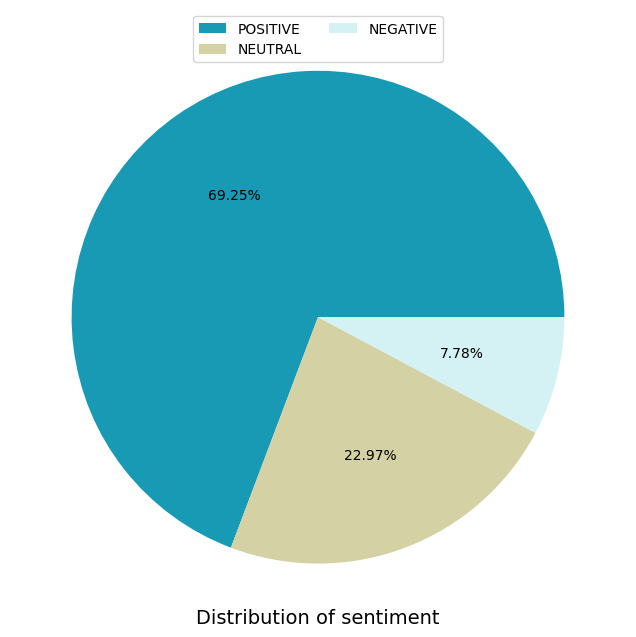

In [ ]:
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
colors = ['#189AB4', '#D4D1A4', '#D4F1F4']
plt.pie(newDf['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

**Create New Column 'Sentiment'**

In [ ]:
newDf['sentiment'] = [-1 if x < -0.05 else 1 if x > 0.05 else 0 for x in newDf['compound']]

In [ ]:
# sia.polarity_scores('We bought this for daughter for christmas. Fantastic tablet')

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.5574}

**Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = newDf['clean_review']
Y = newDf['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

**Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [ ]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [ ]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

**Train and Test Model**

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)

pred = model.predict(x_test_dtm)

In [ ]:
accuracy_score(y_test, pred)

0.8550180505415163

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.62      0.48      0.54       537
           0       0.78      0.80      0.79      1565
           1       0.90      0.91      0.91      4823

    accuracy                           0.86      6925
   macro avg       0.77      0.73      0.75      6925
weighted avg       0.85      0.86      0.85      6925



**Other Models**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(x_train, y_train)

predictedMultiNB = clf_multiNB_pipe.predict(x_test)
mnb = np.mean(predictedMultiNB == y_test)
mnb*100

69.68953068592057

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()),
                            ("tfidf", TfidfTransformer()),
                            ("clf_logReg", LogisticRegression(max_iter = 1000))])
clf_logReg_pipe.fit(x_train, y_train)

predictedLogReg = clf_logReg_pipe.predict(x_test)
lrc = np.mean(predictedLogReg == y_test)
lrc*100

83.5523465703971

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()),
                                  ("tfidf", TfidfTransformer()),
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(x_train, y_train)

predictedDecisionTree = clf_decisionTree_pipe.predict(x_test)
dtc = np.mean(predictedDecisionTree == y_test)
dtc*100

79.37906137184115

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()),
                                  ("tfidf", TfidfTransformer()),
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(x_train, y_train)

predictedRandomForest = clf_randomForest_pipe.predict(x_test)
rfc = np.mean(predictedRandomForest == y_test)
rfc*100

81.53068592057761